# The Solow model with oil and climate change

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
from scipy import linalg
import sympy as sm
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject
from modelproject import OilSolowModelClass
model = OilSolowModelClass()

initializing the model
calling.setup()


# Model description

This model project is inspired by the Macroeconomics I exam from 17th feburay 2020. It is a solow model in a closed economy with an exhaustible
natural resource (oil) it includes economic damage to the production output from climate change with the fraction D.



$$
\begin {aligned}
Y_t &= [1 - D_t] K_t^\alpha (A_tL_t)^\beta E_t^\eta, \alpha, \beta, \eta >0, \alpha +\beta +\eta =1 \\
D_t &= 1 - \frac{R_t}{R_0}^\phi , \phi    \geq 0    \\
R_{t+1} &= R_t - E_t,             R_0>0                \\
E_t &= s_E R_t, 0< s_E <1                                     \\
K_{t+1} &= sY_t + (1 - \delta )K_t, 0 < s < 1, 0 < \delta <1, k_0 > 0               \\
L_{t+1} &= (1 + n)L_t, L_0 > 0                              \\
A_{t+1} &= (1 + g)A_t, A_0 > 0                               \\
\end {aligned}
$$

The first equation is a Cobb-Douglas production function describing total output $(Y_t)$ as a function of the physical capital $(K_t)$, labor $(L_t)$, technology $(A_t)$ and oil $(E_t)$. We assume that climate change reduce the production by a share $D_t$, giving us a damage to the production $(D_tY_t)$ and the share $1-D_t$ survives to consumption and investments. The damage by climate change is given in equation 2 where the climate damages depend on the consumption of oil. If $R_t=R_0$ there is no climate damages, giving us that $D_t=0$ and all the output can be used. The development in the total oil stock $(R_t)$ is given by equation 3 and 4 where $E_t$ us the consumption of oil and $sE$ is the production og oil. The capital accumulation is described by equation 5 with $s$ as savings rate and $\delta$ the depriciation in capital. Equation 6 and 7 decribes how technology $(A_T)$ and labor $(L_t)$ develops over time. 

We define $y_t= \frac{Y_t}{L_t}, k_t = \frac{K_t}{L_t}, e_t = \frac{E_t}{L_t}$ and $ z_t= \frac{k_t}{y_t}, g^y_t= \ln y_{t+1}- \ln y_t, g_t^k=\ln k_{t+1}-\ln k_t$ 




We find that GDP pr worker can be written as:
$$
\begin {aligned}
y_t=[1 - D_t]k^\alpha _tA^\beta_t e^\epsilon_t
\end {aligned}
$$
And that the apporximate growth rate in GDP pr. worker is:
$$
\begin {aligned}
g^y_t=\alpha g_t^k+\beta g-\epsilon n-\epsilon s_E
\end {aligned}
$$


## Analytical solution

As the model includes climate damages and damages the production when oil is used, we wish to analyse how the climate damages develope over time if $\phi > 0$, as we see that there will be no climate damages when $\phi=0$. We find the size of the share of lost production caused by climate change after 50 years. This is done by solving for $D_t$
$$
\begin {align*}
R_{t+1} &= R_t - s_E R_t \\
R_{t+1} &= (1-s_E)R_t\\
R_t &= R_0(1-s_E)^t \\
D_t &= 1- \left(\frac{R_0(1-s_E)^t}{R_0}\right)^\phi\\
D_t &= 1- (1- s_E))^{\phi t}
\end {align*}
$$

We solve this numerically by using SymPy in the py-file and get the following result:

In [2]:
model.solve_climate_damage()
model.calculate_D_t()

0.22168744293135811

This shows us that  78 pct. of the output survives the climate damages to the economy after 50 years. Giving us a climate damage from the oil consumption of 22 pct. of the total output. The development of climate damages to the output over time is shown in figure 1. We see that this is a concave increasing function that goes toward 1.

initializing the model
calling.setup()


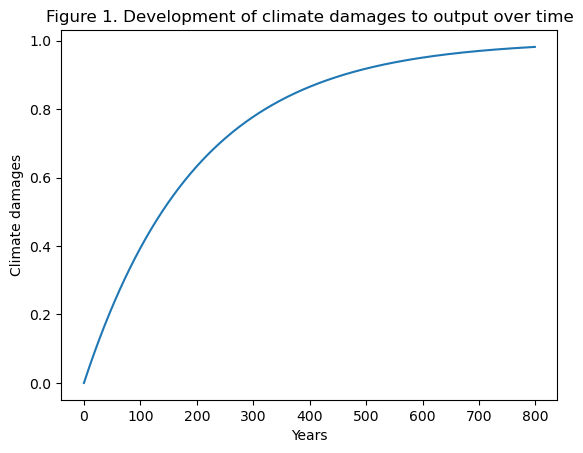

In [3]:
model = OilSolowModelClass()
model.solve_climate_damage()

t = np.arange(800)
D_t = [model.calculate_D_t(i) for i in t]

plt.plot(t, D_t)
plt.title('Figure 1. Development of climate damages to output over time')
plt.xlabel('Years')
plt.ylabel('Climate damages')
plt.show()

## Numerical solution

Under balanced growth where $z_{t+1} = z_t =z^*$ the approximate growth rate in GDP per worker can be expressed as:
$$
\begin {align*}
g^y =\frac{\beta}{\beta + \epsilon}g-\frac{\epsilon}{\beta + \epsilon}n-\frac{\epsilon}{\beta + \epsilon}s_E-\frac{\phi}{\beta + \epsilon}s_E
\end {align*}
$$
By using plausible parameters ($\alpha=0.2; \beta =0.6; g=0.027; n=0.01;s_E=0.005)$ we examine how important climate change is for steady-state growth in GDP per worker. This is done by examining the magnitude of phi when phi is unknown. To find phi we use numerical optimization from scipy in the form of a root_scalar function to find the solution.

In [4]:
model = OilSolowModelClass()
model.find()


initializing the model
calling.setup()


2.6399999999999997

This gives us that $\phi=2.64$ if we insert this in the damage function for $t=100$ we get $D_{100}=1-(1-0.005)^{2.64*100}=0.73$. This indicates that after 100 years only $27$ pct of the production will be left. We know from literature that the standard worst case senario of climate dammage is approximatly $20$ pct after 100 years, this indicates that the $\phi$ found may be overestimated. Thus the climate damages to the economy depends on the size of $\phi$.

# Further analysis

### Simulation og changes in oil consumption

To furteher analyze if the model shows balanced growth with and without climate change, we will try to assign different values to $\phi$: $\phi = 0.5$, $\phi =1$ and $ \phi = 0$.
This is done by making 3 simulations of the model for the 3 versions of climate change from oil consumption. 

We first investigate how the capital-output relationship evolves over time by estimating $g^y$ given $\phi =0.5$ and $g^y$ given $\phi=0$ 

In [5]:
model = OilSolowModelClass()
model.balance_climate()

initializing the model
calling.setup()


0.013374999999999998

In [6]:
model = OilSolowModelClass()
model.balance_no_climate()

initializing the model
calling.setup()


0.016499999999999997

This gives us the growth rate in GDP per worker on the balanced growth path, where $g^y$ given $\phi =0.5$ is equal to $1.33 $ pct and $g^y$ given $\phi=0$ is equal to $1.65 $ pct. After this we simulate the 3 senarios for $\phi$ and 

initializing the model
calling.setup()


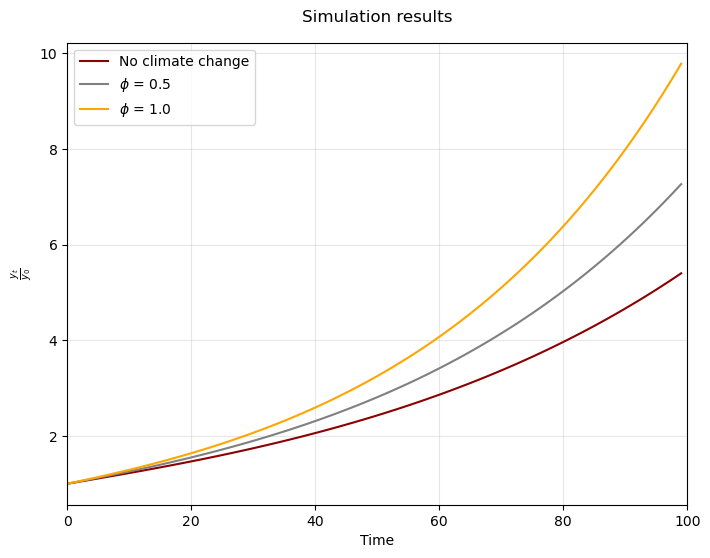

In [7]:
# we run our 3 simulations from the py-file: 
model = OilSolowModelClass()
sim = model.sim
model.simulate1() # no climate change
model.simulate2() # phi = 0.5
model.simulate3() #phi = 1.0

fig, ax = plt.subplots(figsize=(8, 6))

# Plot the three simulations
ax.plot(np.arange(model.par.simT), model.sim.fracY, label='No climate change', c='darkred')
ax.plot(np.arange(model.par.simT), model.sim.fracYD, label=r'$\phi$ = 0.5', c='grey')
ax.plot(np.arange(model.par.simT), model.sim.fracYDgrowth, label=r'$\phi$ = 1.0', c='orange')

# Set the y-axis limits and add a grid
ax.set_xlim(0,100)
ax.grid(True, alpha=0.3)

# Set the x-axis and y-axis labels, title, and legend
ax.set_xlabel('Time')
ax.set_ylabel(r'$\frac{y_t}{y_0}$')
ax.set_title('Simulation results', pad=15)
ax.legend()
plt.show()

As statet above the Solow Model with oil is simulatet in 3 versions: without climate change, with moderate climate change ($\phi = 0.5$) and with significant climate change     ($\phi = 1$). The model calculates the dynamics of various variables such as capital stock, workforce, total factor productivity, oil reserves, and GDP over 100 periods. 

In the simulation without climate change, the model assumes constant oil reserves and no climate damage. It calculates the relative growth in GDP over time. 

In the simulation with moderate climate change, the model incorporates a climate damage parameter and calculates the relative growth in GDP considering the impact of climate change.

In the simulation with significant climate change, the model assumes a higher climate damage parameter, leading to more pronounced effects on GDP growth.

# Conclusion

In this project we analyze the Solow growth model with climate changes and oil included. We examine how important climate change is for steady-state growth in GDP per worker. This is done with a numerical solution that gives us $\phi=2.64$ if we insert this in the damage function and this indicates that after 100 years only $27$ pct of the production will be left when including climate change.



We also investigate how the capital-output relationship evolves over time by estimating $g^y$ given $\phi =0.5$ and $g^y$ given $\phi=0$. This gives us the growth rate in GDP per worker on the balanced growth path, where $g^y$ given $\phi =0.5$ is equal to $1.33 $ pct and $g^y$ given $\phi =0$ is equal to $1.65 $ pct. Thereby climate change affects the capital-output relationship negatively. 